In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
pd.set_option("display.max_columns", 1000)
plt.style.use('fivethirtyeight')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [199]:
path = '/content/drive/MyDrive/Datathon/'

brn = pd.read_csv(path + 'education_brn.csv').iloc[1:]
idn = pd.read_csv(path + 'education_idn.csv').iloc[1:]
khm = pd.read_csv(path + 'education_khm.csv').iloc[1:]
lao = pd.read_csv(path + 'education_lao.csv').iloc[1:]
mmr = pd.read_csv(path + 'education_mmr.csv').iloc[1:]
mys = pd.read_csv(path + 'education_mys.csv').iloc[1:]
phl = pd.read_csv(path + 'education_phl.csv').iloc[1:]
sgp = pd.read_csv(path + 'education_sgp.csv').iloc[1:]
tha = pd.read_csv(path + 'education_tha.csv').iloc[1:]
vnm = pd.read_csv(path + 'education_vnm.csv').iloc[1:]

df_all = pd.concat([brn, idn, khm, lao, mmr, mys, phl, sgp, tha, vnm], ignore_index=True)

In [194]:
columns = ['Population ages 15-64 (% of total population)',
 'Population ages 0-14 (% of total population)',
 'Number of under-five deaths, female',
 'Number of infant deaths, female',
 'Number of infant deaths, male',
 'Number of under-five deaths, male',
 'Secondary education, duration (years)',
 'Primary education, duration (years)',
 'Primary school starting age (years)',
 'Lower secondary school starting age (years)',
 'School age population, last grade of primary education, both sexes (number)',
 'School enrollment, primary (% gross)',
 'Population of the official entrance age to primary education, female (number)',
 'Official entrance age to upper secondary education (years)',
 'School age population, lower secondary education, both sexes (number)',
 'Theoretical duration of lower secondary education (years)',
 'Population of the official entrance age to primary education, male (number)',
 'Theoretical duration of upper secondary education (years)',
 'School age population, last grade of primary education, male (number)',
 'School age population, last grade of primary education, female (number)',
 'School age population, lower secondary education, female (number)',
 'School age population, primary education, male (number)',
 'Population of the official entrance age to primary education, both sexes (number)',
 'School age population, upper secondary education, male (number)',
 'School age population, upper secondary education, female (number)',
 'School age population, upper secondary education, both sexes (number)',
 'School age population, lower secondary education, male (number)',
 'School age population, secondary education, female (number)',
 'School age population, secondary education, both sexes (number)',
 'School age population, secondary education, male (number)',
 'School age population, primary education, female (number)',
 'School age population, primary education, both sexes (number)',
 'Primary education, pupils',
 'School age population, pre-primary education, male (number)',
 'School age population, pre-primary education, female (number)',
 'School age population, pre-primary education, both sexes (number)',
 'School age population, tertiary education, both sexes (number)',
 'School age population, tertiary education, female (number)',
 'School age population, tertiary education, male (number)',
 'Secondary education, general pupils']

In [195]:
brn_pivot = pd.pivot(brn, index=['Country Name', 'Country ISO3', 'Year'], columns=['Indicator Name'], values='Value')[columns]
idn_pivot = pd.pivot(idn, index=['Country Name', 'Country ISO3', 'Year'], columns=['Indicator Name'], values='Value')[columns]
khm_pivot = pd.pivot(khm, index=['Country Name', 'Country ISO3', 'Year'], columns=['Indicator Name'], values='Value')[columns]
lao_pivot = pd.pivot(lao, index=['Country Name', 'Country ISO3', 'Year'], columns=['Indicator Name'], values='Value')[columns]
mmr_pivot = pd.pivot(mmr, index=['Country Name', 'Country ISO3', 'Year'], columns=['Indicator Name'], values='Value')[columns]
mys_pivot = pd.pivot(mys, index=['Country Name', 'Country ISO3', 'Year'], columns=['Indicator Name'], values='Value')[columns]
phl_pivot = pd.pivot(phl, index=['Country Name', 'Country ISO3', 'Year'], columns=['Indicator Name'], values='Value')[columns]
sgp_pivot = pd.pivot(sgp, index=['Country Name', 'Country ISO3', 'Year'], columns=['Indicator Name'], values='Value')[columns]
tha_pivot = pd.pivot(tha, index=['Country Name', 'Country ISO3', 'Year'], columns=['Indicator Name'], values='Value')[columns]
vnm_pivot = pd.pivot(vnm, index=['Country Name', 'Country ISO3', 'Year'], columns=['Indicator Name'], values='Value')[columns]

In [161]:
df = pd.concat([brn_pivot, idn_pivot, khm_pivot, lao_pivot, mmr_pivot, mys_pivot, phl_pivot, sgp_pivot, tha_pivot, mmr_pivot, vnm_pivot], ignore_index=False).filter(regex=' male').reset_index()

<ipython-input-162-c5e291fd1b58>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 3:] = df.iloc[:, 3:].astype('float32')


In [163]:
countries = ['BRN', 'IDN', 'KHM', 'LAO', 'MMR', 'MYS', 'PHL', 'SGP', 'THA', 'VNM']

# Mass Plotting

## Deaths

In [164]:
infant_deaths = df.groupby('Year').agg({'Number of infant deaths, male': 'mean', 'Number of under-five deaths, male' : 'mean'})

In [165]:
infant_deaths[infant_deaths['Number of infant deaths, male']==infant_deaths['Number of infant deaths, male'].max()]

Indicator Name,"Number of infant deaths, male","Number of under-five deaths, male"
Year,,
1960,73778.164062,104597.664062


In [166]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors

['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c']

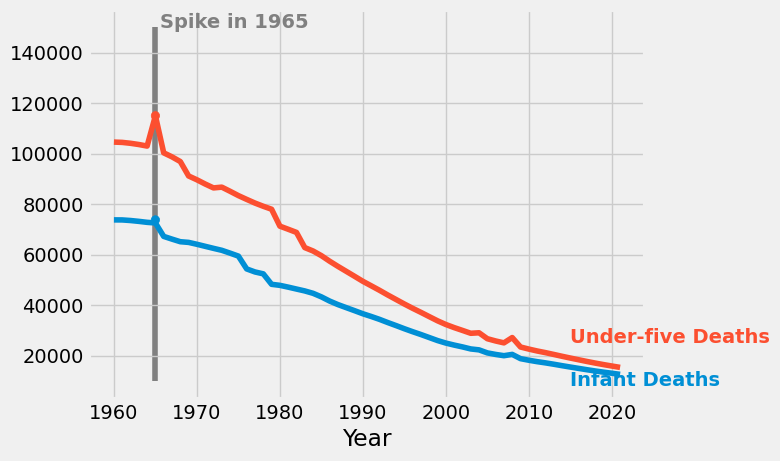

In [167]:
ax = infant_deaths.plot(style='-', zorder=1)
plt.scatter(x=[5, 5],
            y=[infant_deaths['Number of infant deaths, male'].max(), infant_deaths['Number of under-five deaths, male'].max()],
            color=['#008fd5', '#fc4f30'])
ax.legend().remove()
ax.text(55, 8000, 'Infant Deaths', color='#008fd5', fontweight='bold')
ax.text(55, 25000, 'Under-five Deaths', color='#fc4f30', fontweight='bold')
plt.vlines(5, ymin=10000, ymax=150000, color='grey', zorder=0)
plt.text(5.5, 150000, 'Spike in 1965', color='grey', fontweight='bold')
ax.grid(zorder=-2)

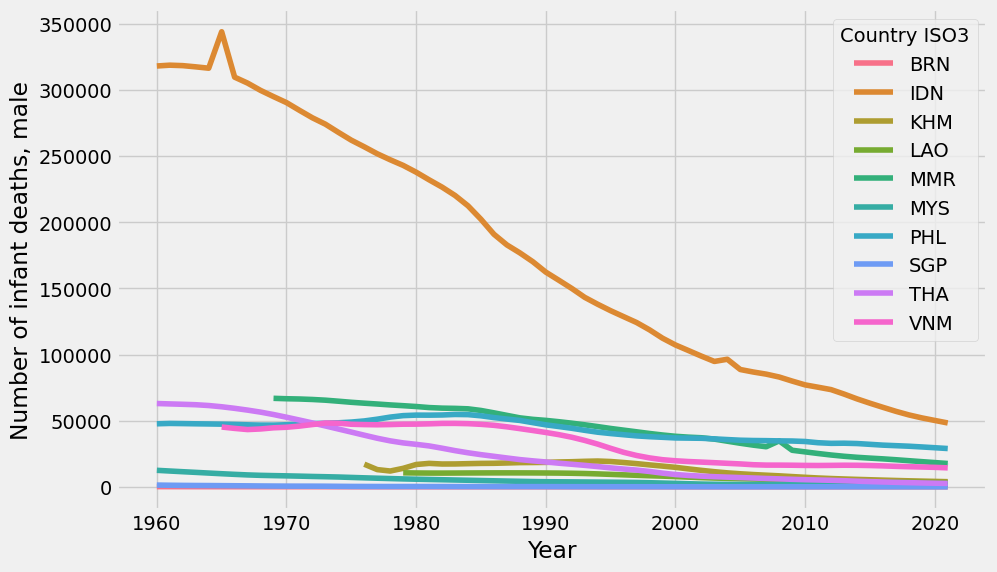

In [168]:
fig, axes = plt.subplots(figsize=(10, 6.18))
ax = sns.lineplot(data=df, x='Year', y='Number of infant deaths, male', hue='Country ISO3')
x_values = ax.get_xticks()
y_values = ax.get_yticks()

new_x = [x_values[i] for i in range(0, 61, 10)]
# new_y = [y_values[i] for i in [0, y_len // 2, -1]]

ax.set_xticks(new_x)
# ax.set_yticks(new_y)

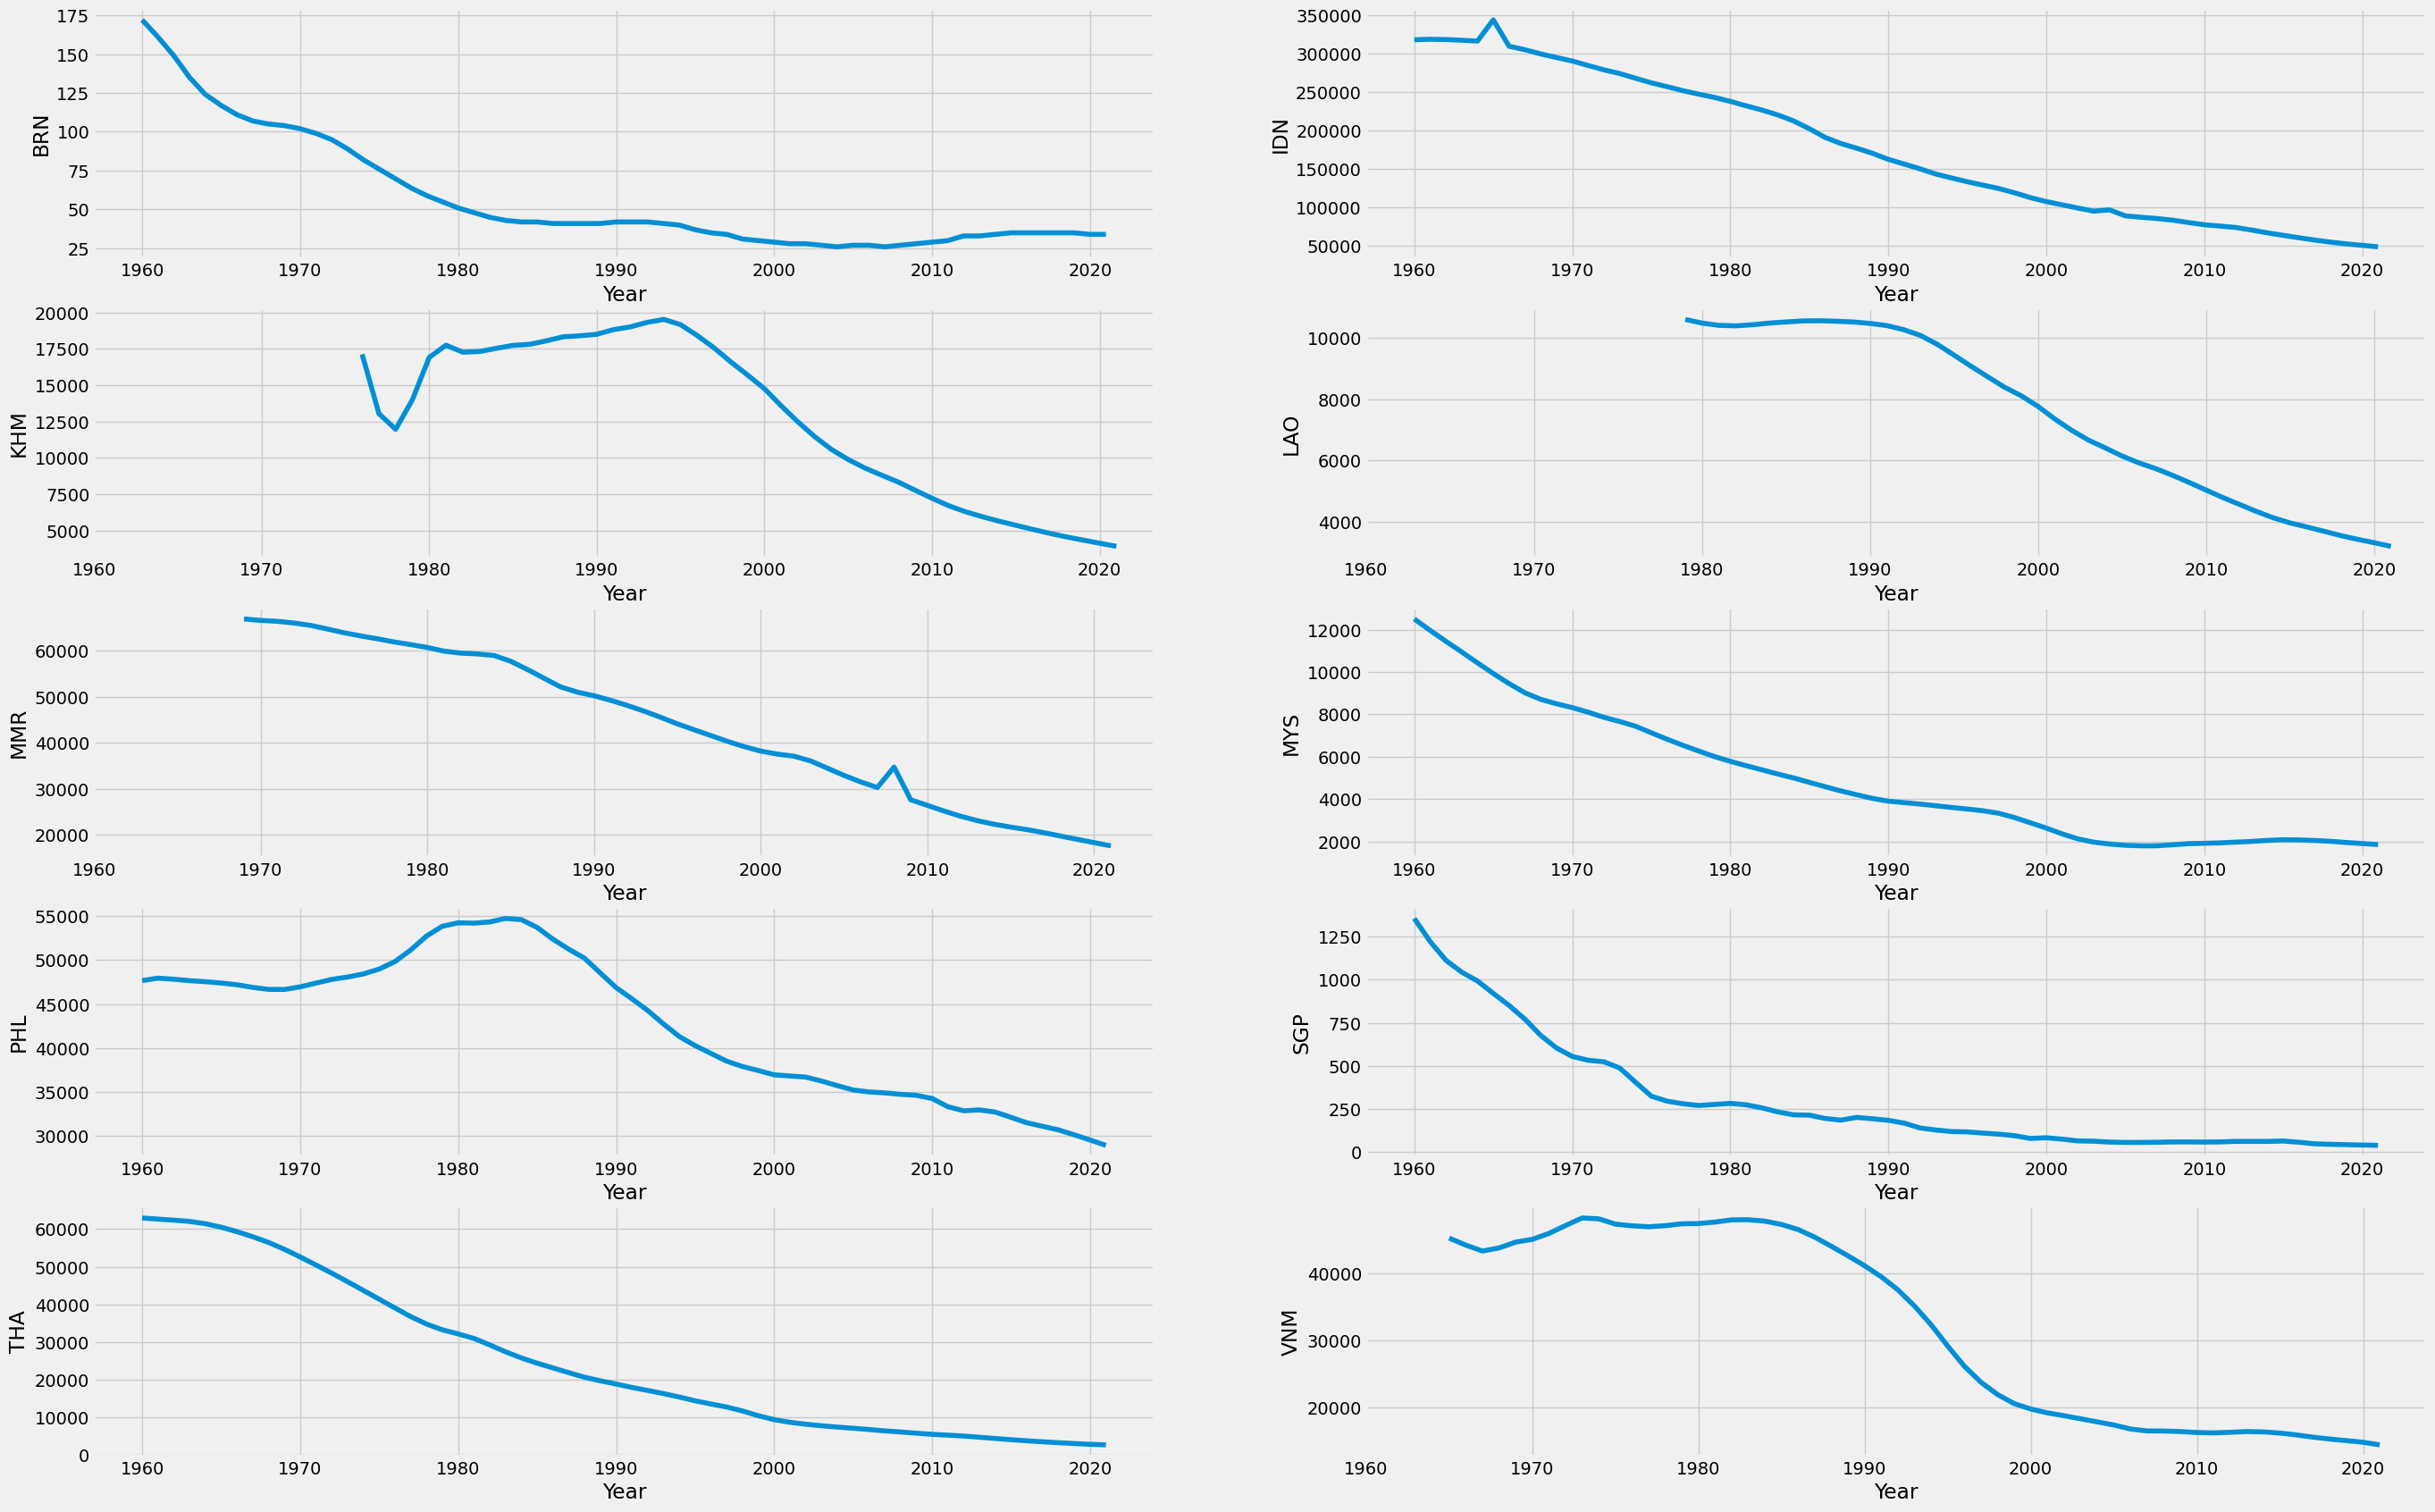

In [174]:
fig, axes = plt.subplots(5, 2, figsize=(30, 20))
axes = axes.flatten()
for i, country in enumerate(countries):
  sns.lineplot(data=df[df['Country ISO3']==country], x='Year', y='Number of infant deaths, male', ax=axes[i])
  x_values = axes[i].get_xticks()
  y_values = axes[i].get_yticks()

  new_x = [x_values[i] for i in range(0, len(x_values)+1, 10)]
  axes[i].set_xticks(new_x)
  axes[i].set_ylabel(country)
  axes[i].legend().remove()

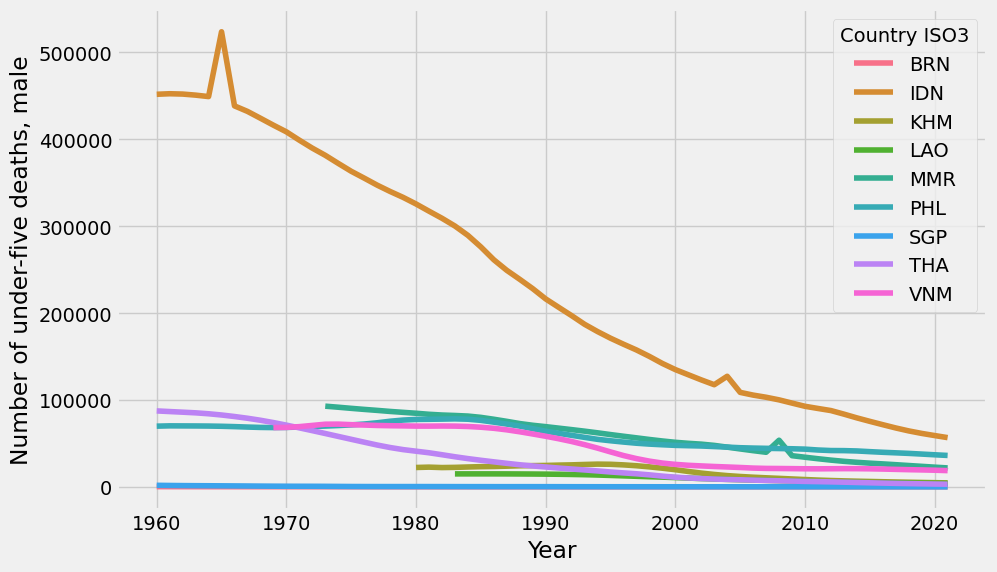

In [144]:
fig, axes = plt.subplots(figsize=(10, 6.18))
ax = sns.lineplot(data=df, x='Year', y='Number of under-five deaths, male', hue='Country ISO3')
x_values = ax.get_xticks()
y_values = ax.get_yticks()

new_x = [x_values[i] for i in range(0, 61, 10)]
# new_y = [y_values[i] for i in [0, y_len // 2, -1]]

ax.set_xticks(new_x)
# ax.set_yticks(new_y)

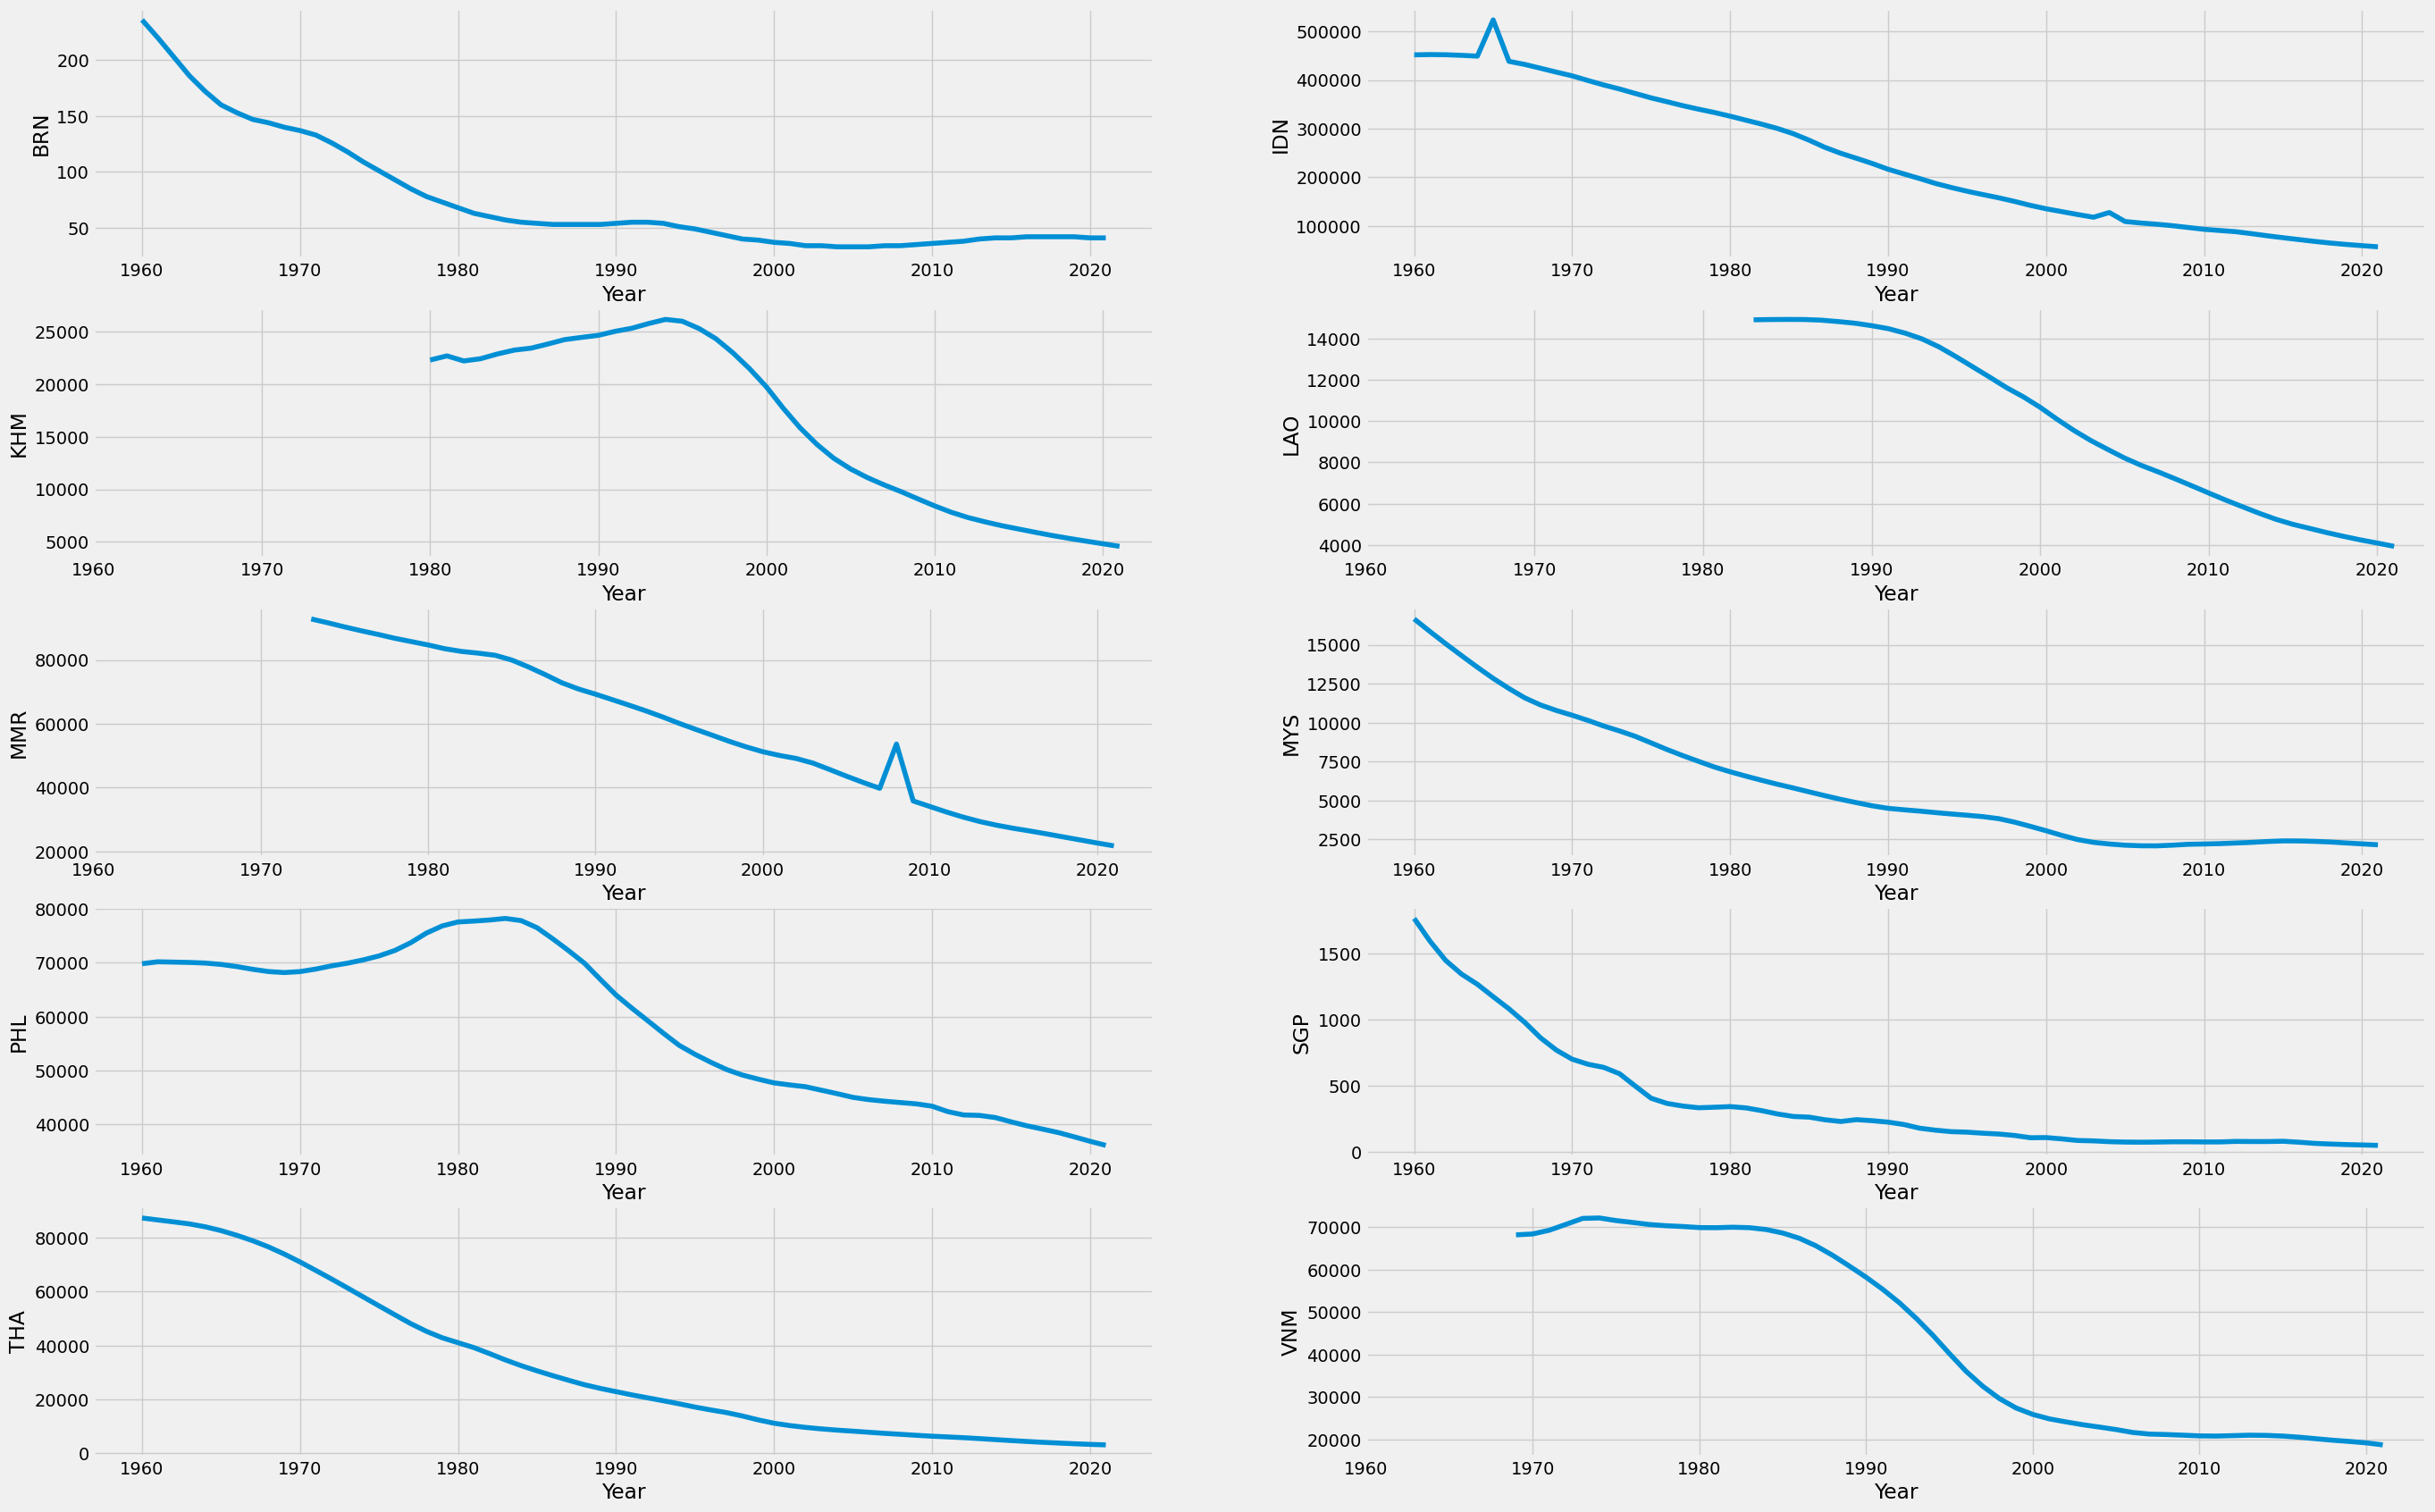

In [175]:
fig, axes = plt.subplots(5, 2, figsize=(30, 20))
axes = axes.flatten()
for i, country in enumerate(countries):
  sns.lineplot(data=df[df['Country ISO3']==country], x='Year', y='Number of under-five deaths, male', ax=axes[i])
  x_values = axes[i].get_xticks()
  y_values = axes[i].get_yticks()

  new_x = [x_values[i] for i in range(0, len(x_values)+1, 10)]
  axes[i].set_xticks(new_x)
  axes[i].set_ylabel(country)
  axes[i].legend().remove()

## Education

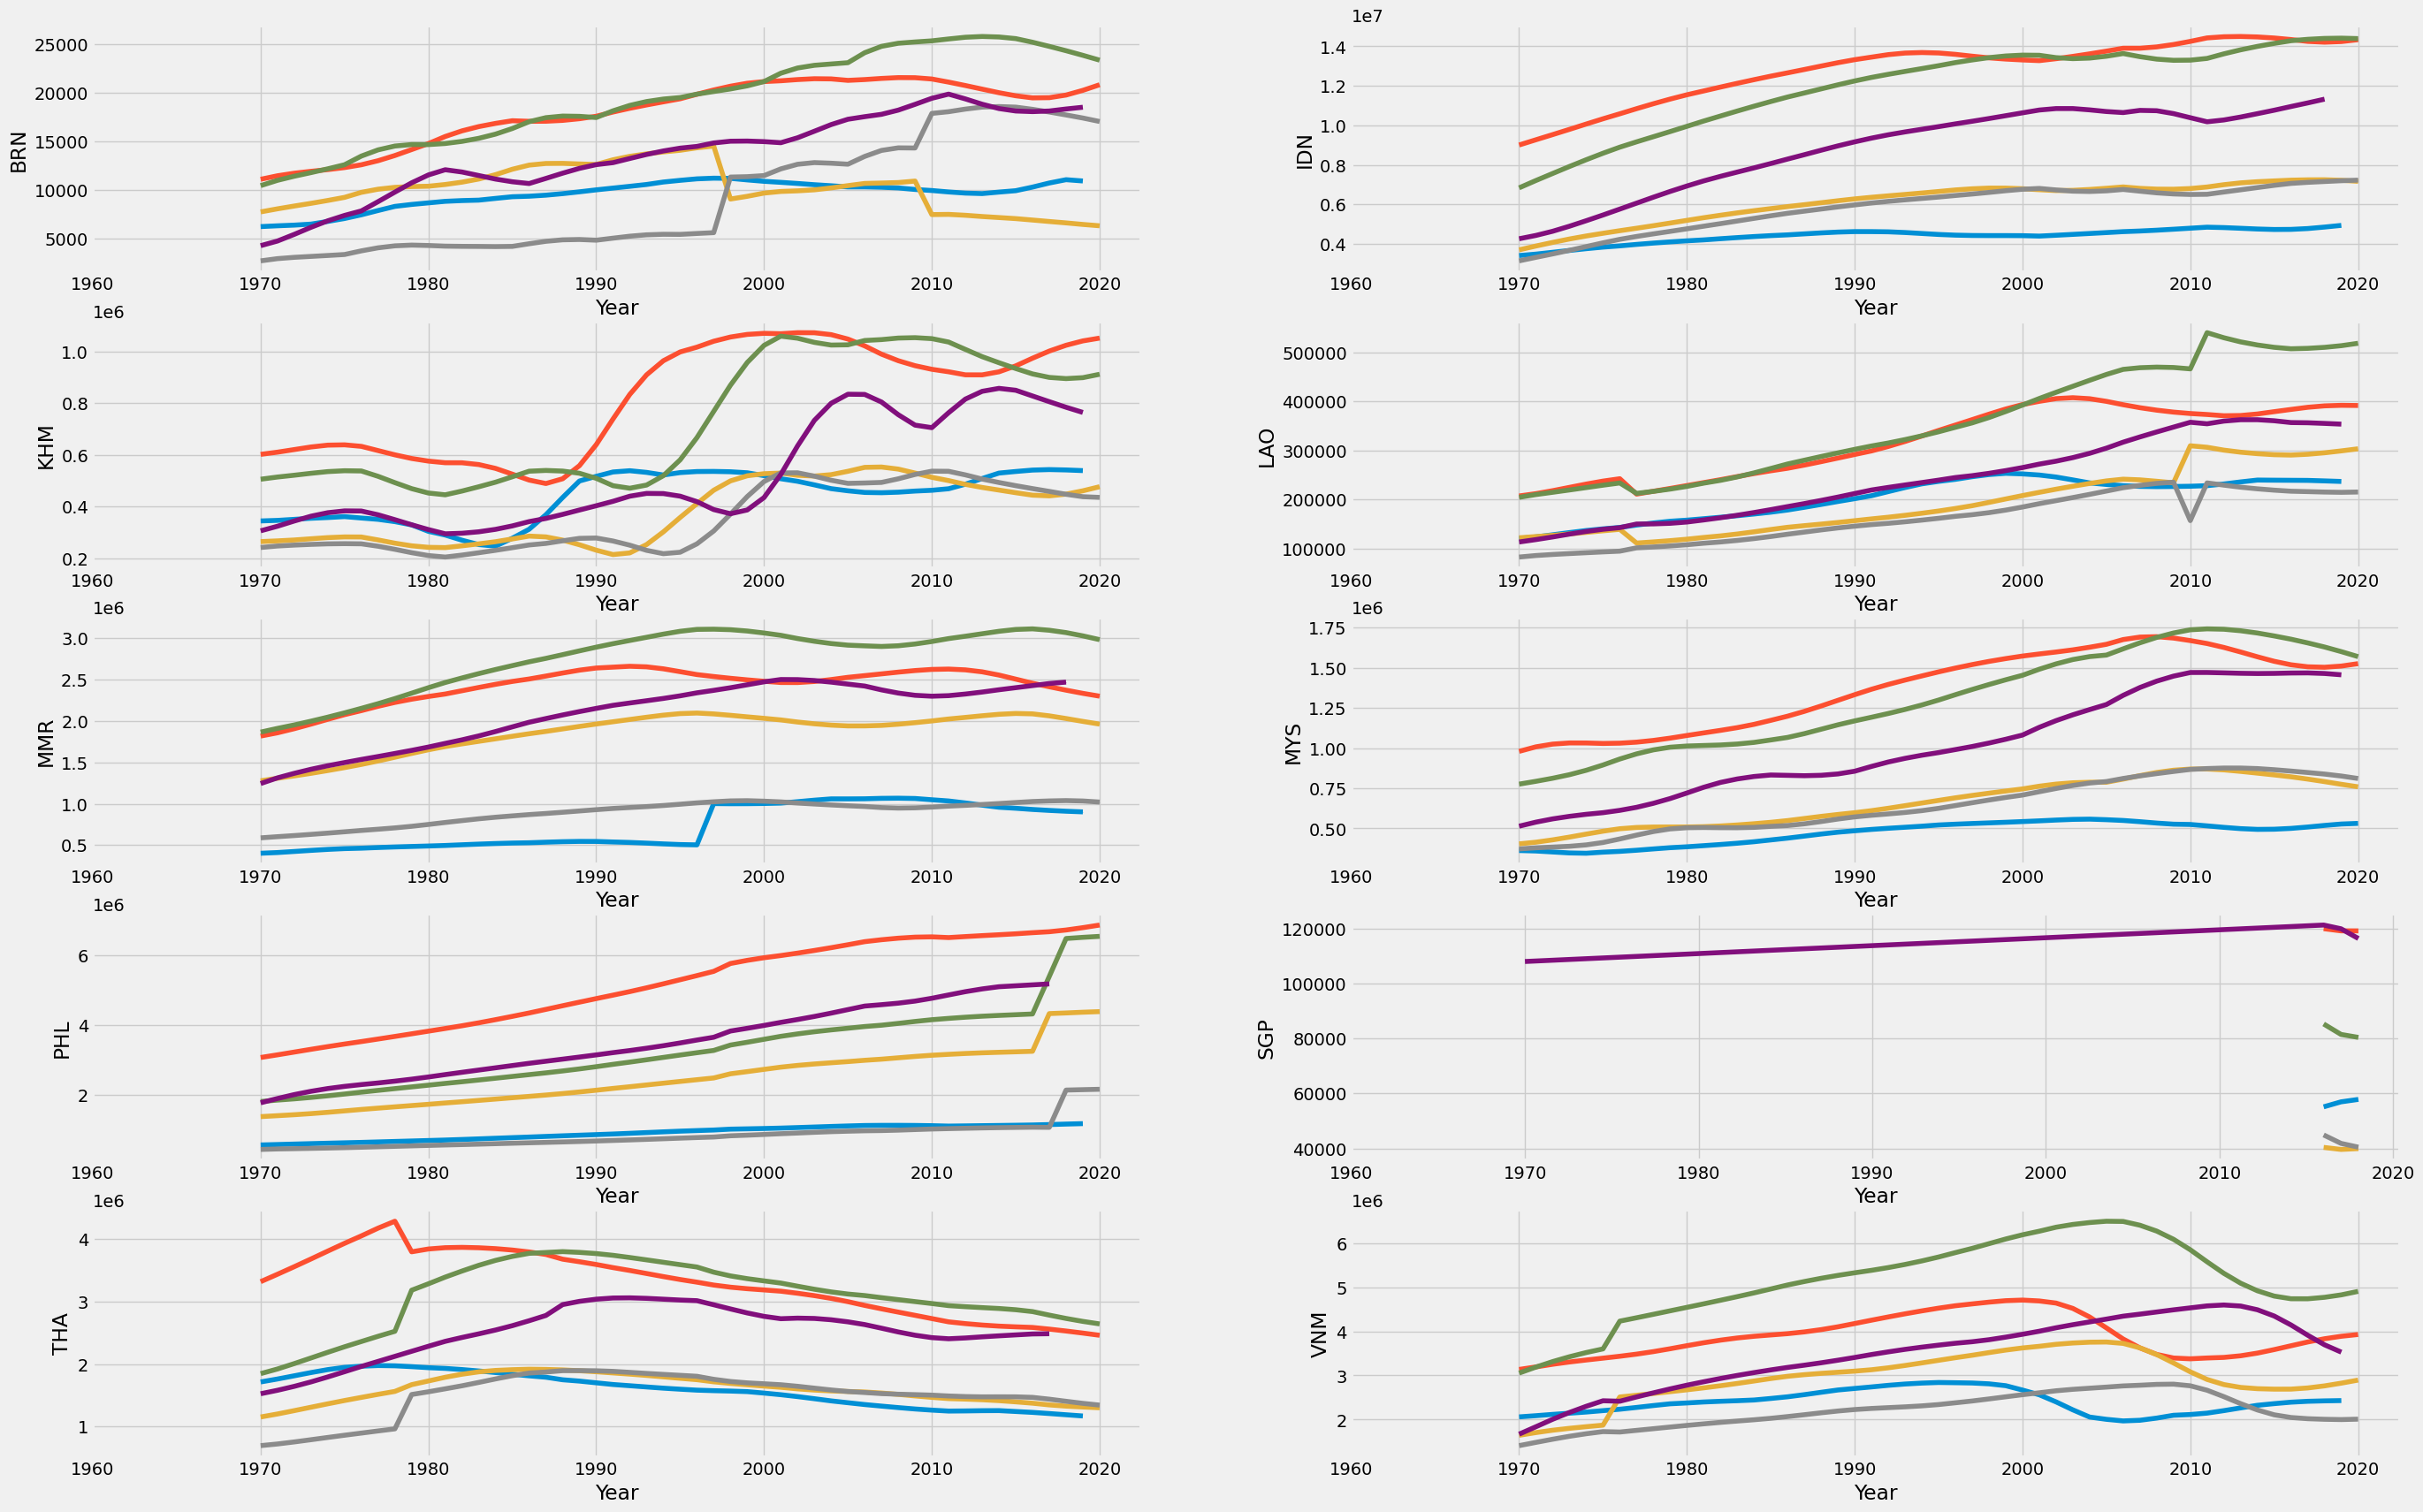

In [197]:
fig, axes = plt.subplots(5, 2, figsize=(30, 20))
axes = axes.flatten()

palette = sns.color_palette(n_colors=6, as_cmap=True)
columns = ['School age population, pre-primary education, male (number)',
           'School age population, primary education, male (number)',
           'School age population, lower secondary education, male (number)',
           'School age population, secondary education, male (number)',
           'School age population, upper secondary education, male (number)',
           'School age population, tertiary education, male (number)']
handles, labels = '', ''
for i, country in enumerate(countries):
  for j, col in enumerate(columns):
    sns.lineplot(data=df[df['Country ISO3']==country], x='Year', y=col, ax=axes[i], color=palette[j])

  x_values = axes[i].get_xticks()
  y_values = axes[i].get_yticks()

  new_x = [x_values[i] for i in range(0, len(x_values)+1, 10)]
  handles, labels = axes[i].get_legend_handles_labels()
  axes[i].set_xticks(new_x)
  axes[i].set_ylabel(country)
  if i!=0:
    axes[i].legend().remove()

# Other stuff

In [223]:
df_all[['Year', 'Value']] = df_all[['Year', 'Value']].astype('float32')

In [221]:
step1 = df_all.drop_duplicates(['Country Name', 'Indicator Name']).groupby('Indicator Name')['Indicator Name'].count().to_frame()
indic = step1[step1['Indicator Name']==10]

In [229]:
test = df_all.groupby('Indicator Name').size().reset_index(name='count').sort_values(by='count', ascending=False)
test = test[test['count'] >= 40]
columns = [i for i in test['Indicator Name'].values if i in list(indic.index)]
len(columns)

737

In [240]:
import re
male = [s for s in columns if ' male' in s]

In [241]:
male

['Number of infant deaths, male',
 'Number of under-five deaths, male',
 'School age population, upper secondary education, male (number)',
 'Population of the official entrance age to primary education, male (number)',
 'School age population, last grade of primary education, male (number)',
 'School age population, lower secondary education, male (number)',
 'School age population, primary education, male (number)',
 'School age population, secondary education, male (number)',
 'School age population, pre-primary education, male (number)',
 'School age population, tertiary education, male (number)',
 'School enrollment, primary, male (% gross)',
 'Unemployment, male (% of male labor force) (modeled ILO estimate)',
 'School enrollment, secondary, male (% gross)',
 'Share of male students in secondary education enrolled in vocational programmes (%)',
 'Population, age 0, male',
 'Population, age 16, male',
 'Population, age 1, male',
 'Population, age 10, male',
 'Population, age 11, m

## School enrollment, primary, male (% gross)

In [277]:
 temp = df_all[df_all['Indicator Name']=='School enrollment, primary, male (% gross)']
 temp['Value'] = temp['Value']-100

<ipython-input-277-feab703836b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Value'] = temp['Value']-100


Text(0.5, 1.0, 'School enrollment, primary, male (% gross)')

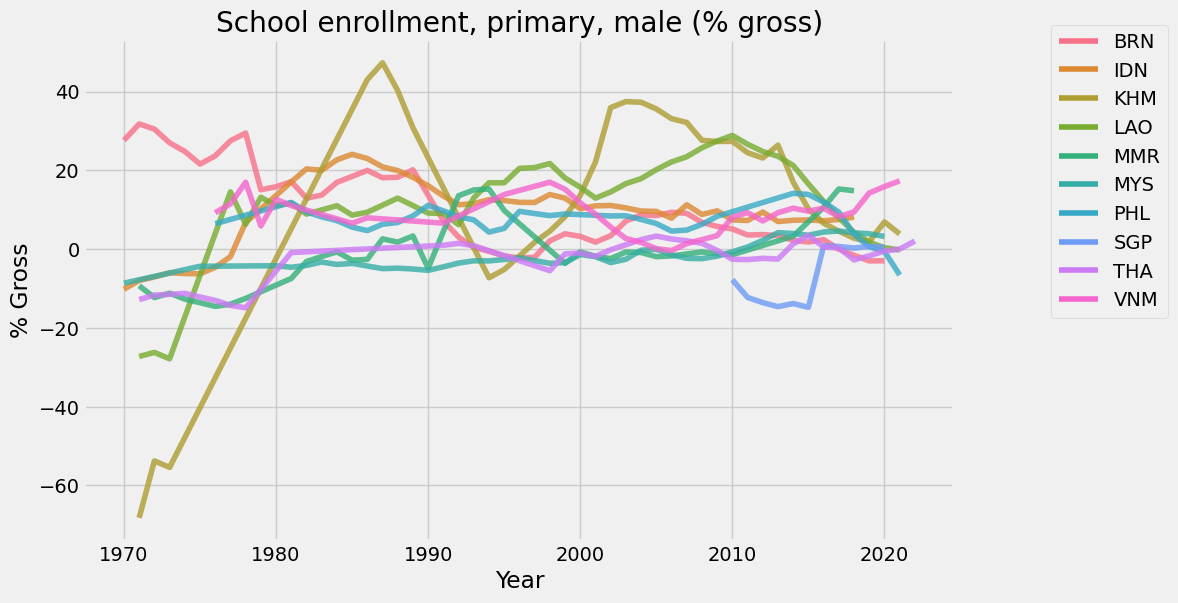

In [278]:
fig, axes = plt.subplots(figsize=(10, 6.18))
ax = sns.lineplot(temp, x='Year', y='Value', hue='Country ISO3', alpha=0.8)
ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.set_ylabel('% Gross')
ax.set_title('School enrollment, primary, male (% gross)')

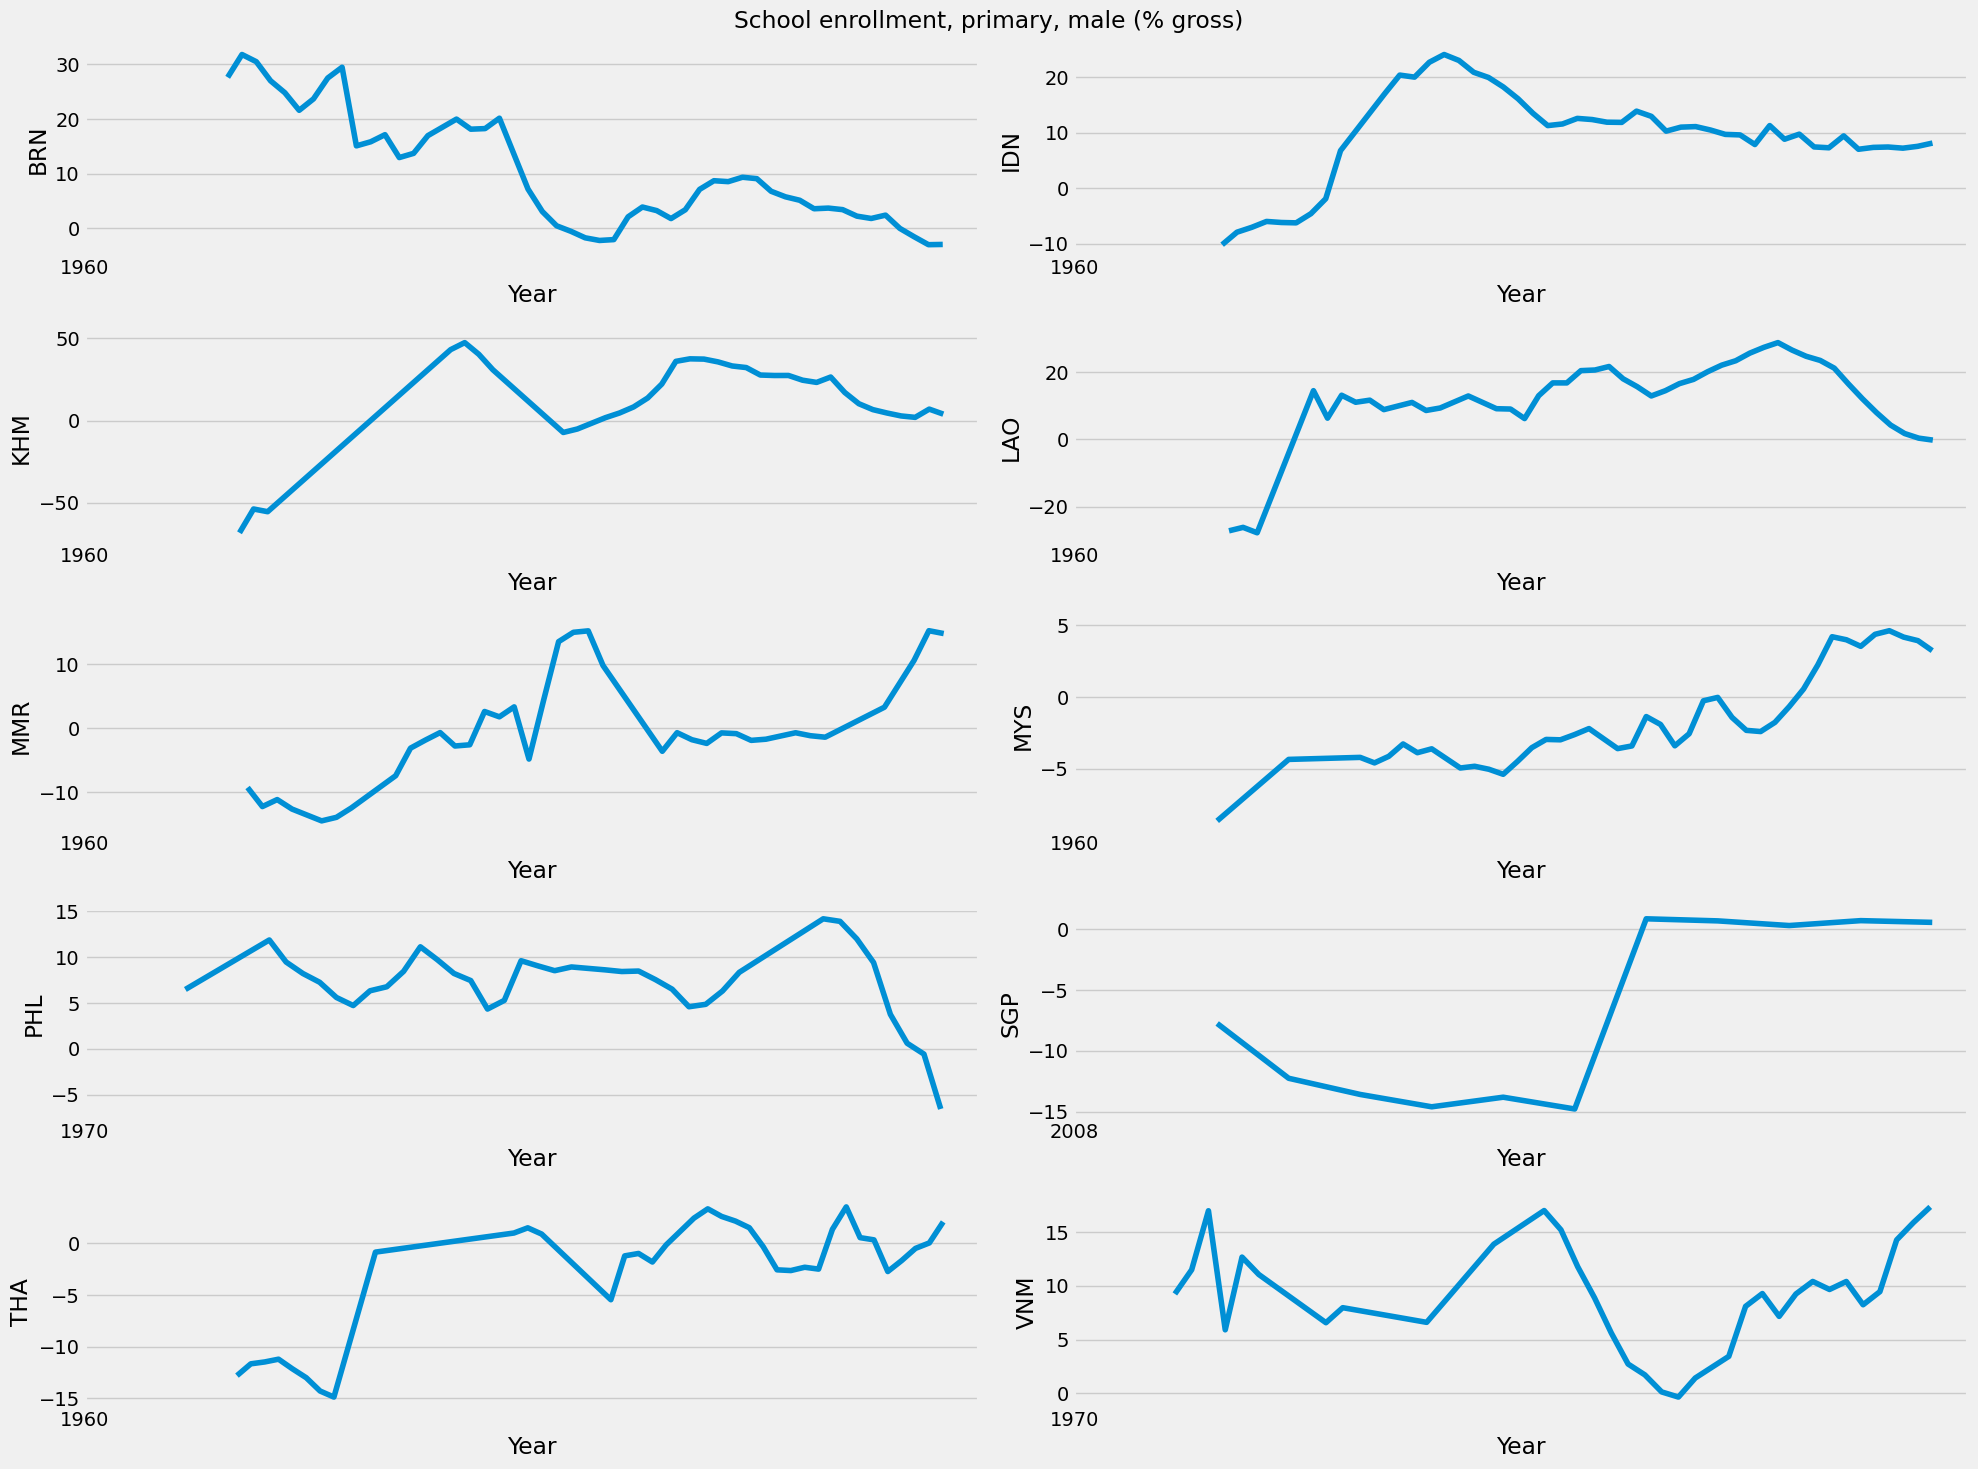

In [285]:
fig, axes = plt.subplots(5, 2, figsize=(20, 15))
axes = axes.flatten()
for i, country in enumerate(countries):
  sns.lineplot(data=temp[temp['Country ISO3']==country], x='Year', y='Value', ax=axes[i])

  x_values = axes[i].get_xticks()
  y_values = axes[i].get_yticks()

  new_x = [x_values[i] for i in range(0, len(x_values)+1, 10)]
  handles, labels = axes[i].get_legend_handles_labels()
  axes[i].set_xticks(new_x)
  axes[i].set_ylabel(country)
  if i!=0:
    axes[i].legend().remove()
fig.suptitle('School enrollment, primary, male (% gross)')
fig.tight_layout()

## Share of male students in secondary education enrolled in vocational programmes (%)

Text(0.5, 1.0, 'Share of male students in secondary education enrolled in vocational programmes (%)')

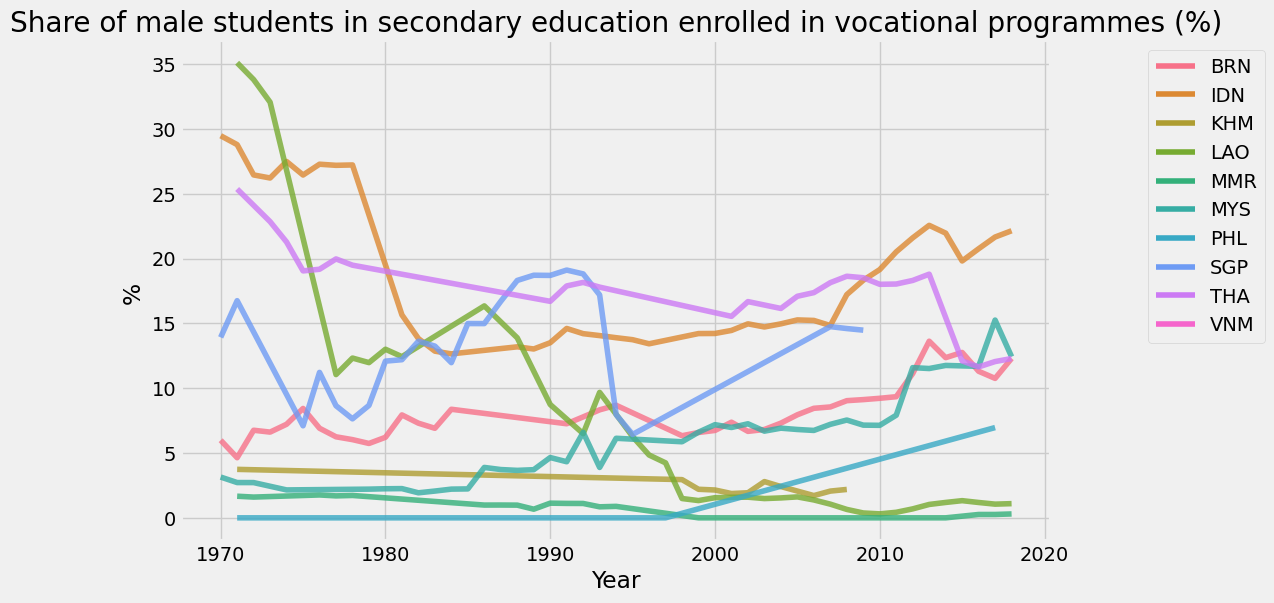

In [288]:
temp = df_all[df_all['Indicator Name']=='Share of male students in secondary education enrolled in vocational programmes (%)']
fig, axes = plt.subplots(figsize=(10, 6.18))
ax = sns.lineplot(temp, x='Year', y='Value', hue='Country ISO3', alpha=0.8)
ax.legend(bbox_to_anchor=(1.1, 1.0))
ax.set_ylabel('% ')
ax.set_title('Share of male students in secondary education enrolled in vocational programmes (%)')

##  School enrollment, tertiary, male (% gross)

Text(0.5, 1.0, 'School enrollment, tertiary, male (% gross)')

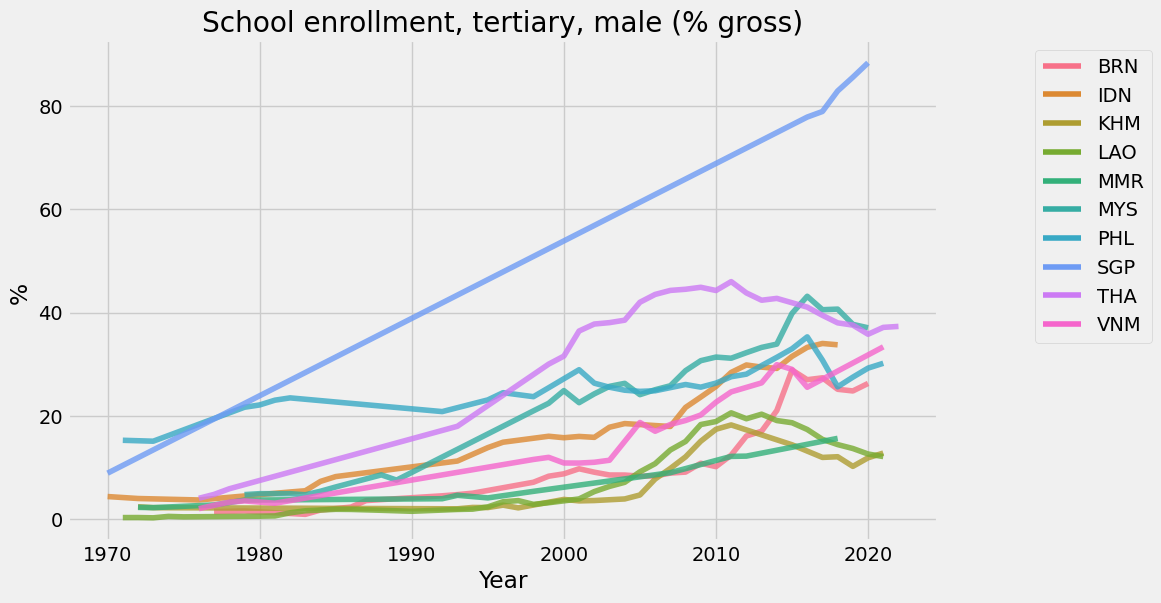

In [294]:
temp = df_all[df_all['Indicator Name']=='School enrollment, tertiary, male (% gross)']
fig, axes = plt.subplots(figsize=(10, 6.18))
ax = sns.lineplot(temp, x='Year', y='Value', hue='Country ISO3', alpha=0.8)
ax.legend(bbox_to_anchor=(1.1, 1.0))
ax.set_ylabel('% ')
ax.set_title('School enrollment, tertiary, male (% gross)')

##  School life expectancy, tertiary, male (years)

Text(0.5, 1.0, 'School life expectancy, tertiary, male (years)')

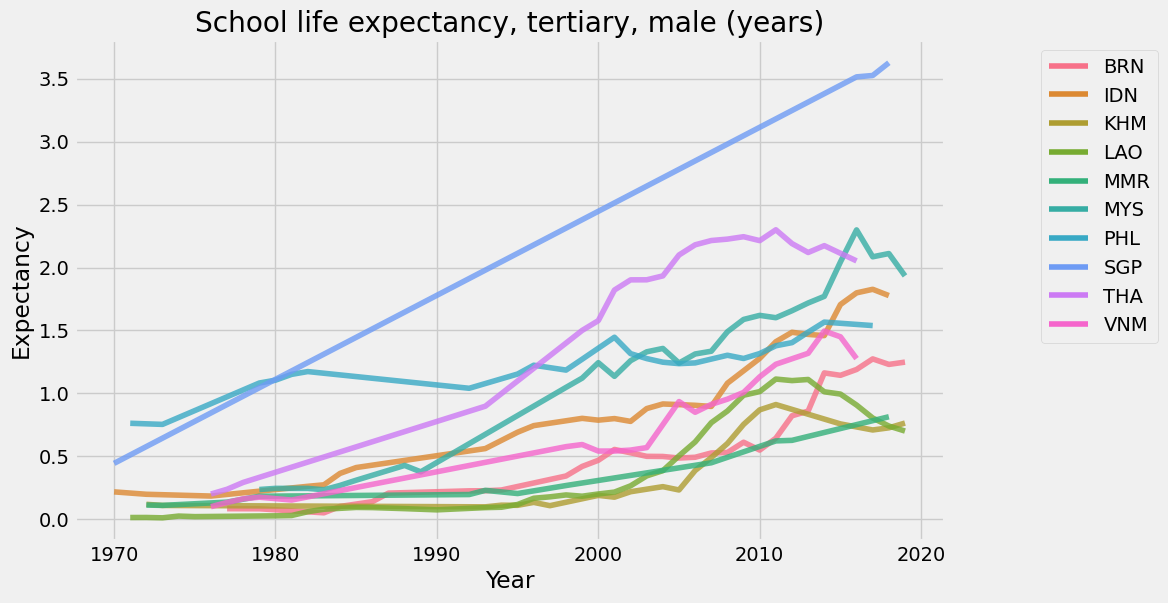

In [296]:
temp = df_all[df_all['Indicator Name']=='School life expectancy, tertiary, male (years)']
fig, axes = plt.subplots(figsize=(10, 6.18))
ax = sns.lineplot(temp, x='Year', y='Value', hue='Country ISO3', alpha=0.8)
ax.legend(bbox_to_anchor=(1.1, 1.0))
ax.set_ylabel('Expectancy')
ax.set_title('School life expectancy, tertiary, male (years)')

##  Primary completion rate, male (% of relevant age group)'

Text(0.5, 1.0, 'Primary completion rate, male (% of relevant age group)')

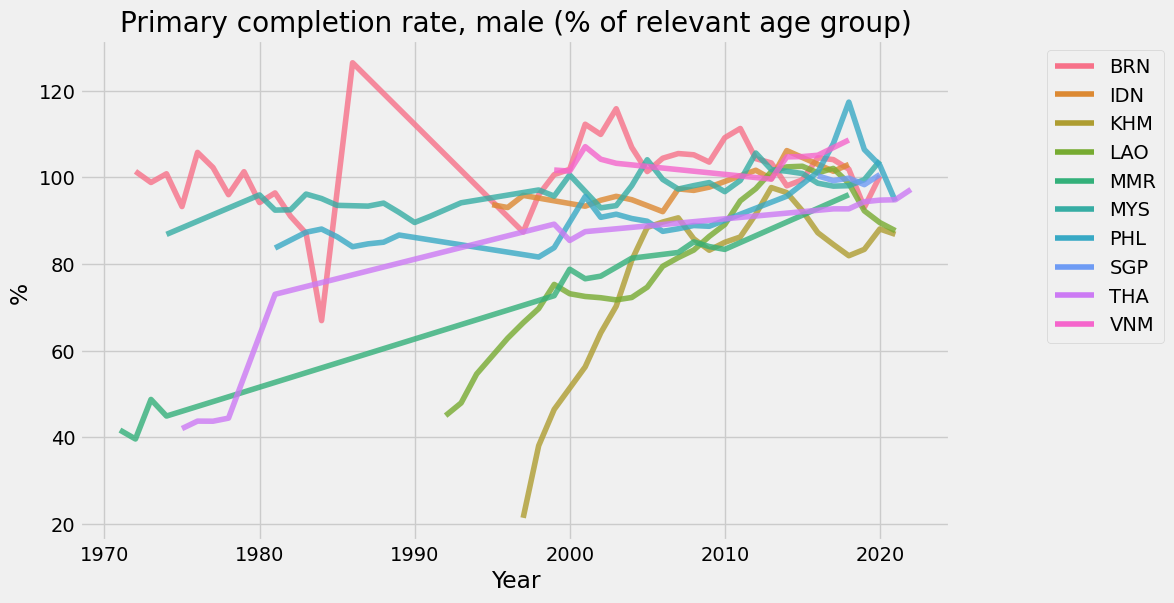

In [298]:
temp = df_all[df_all['Indicator Name']=='Primary completion rate, male (% of relevant age group)']
fig, axes = plt.subplots(figsize=(10, 6.18))
ax = sns.lineplot(temp, x='Year', y='Value', hue='Country ISO3', alpha=0.8)
ax.legend(bbox_to_anchor=(1.1, 1.0))
ax.set_ylabel('% ')
ax.set_title('Primary completion rate, male (% of relevant age group)')

## 'Gross intake ratio in first grade of primary education, male (% of relevant age group)

<ipython-input-312-f8437f5aee9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Value'] = temp['Value']


Text(0.5, 1.0, 'Gross intake ratio in first grade of primary education, male (% of relevant age group)')

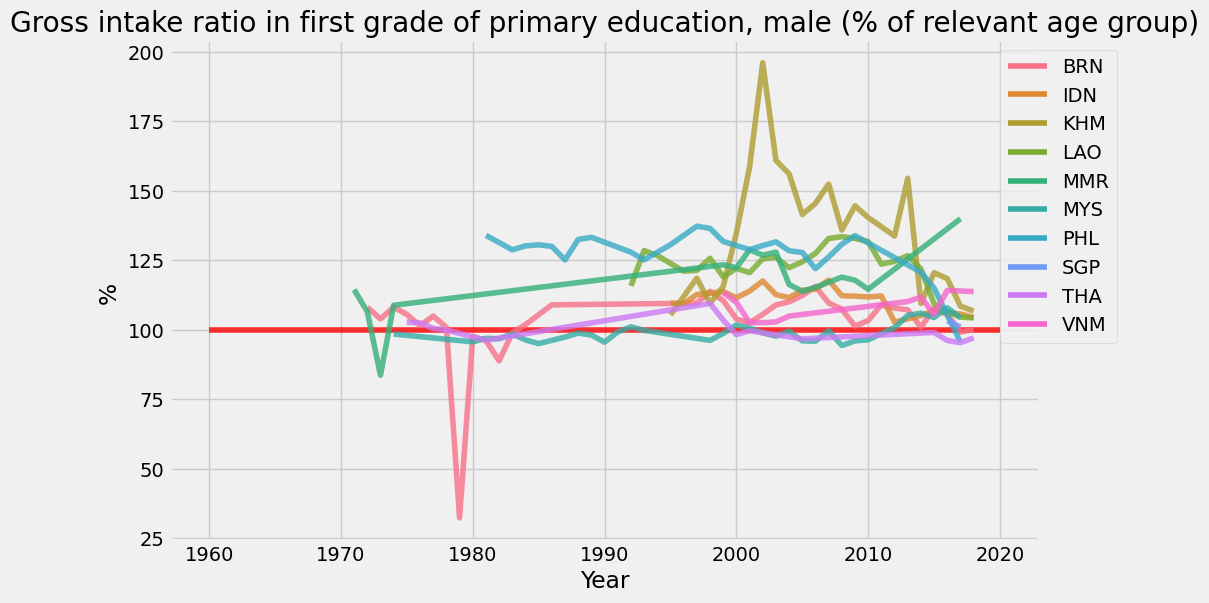

In [312]:
temp = df_all[df_all['Indicator Name']=='Gross intake ratio in first grade of primary education, male (% of relevant age group)']
temp['Value'] = temp['Value']
fig, axes = plt.subplots(figsize=(10, 6.18))
plt.hlines(100, xmin=1960, xmax=2020, alpha=0.8, color='red')
ax = sns.lineplot(temp, x='Year', y='Value', hue='Country ISO3', alpha=0.8)
ax.legend(bbox_to_anchor=(1.1, 1.0))
ax.set_ylabel('% ')
ax.set_title('Gross intake ratio in first grade of primary education, male (% of relevant age group)')


##  'Over-age students, primary, male (% of male enrollment)'

Text(0.5, 1.0, 'Over-age students, primary, male (% of male enrollment)')

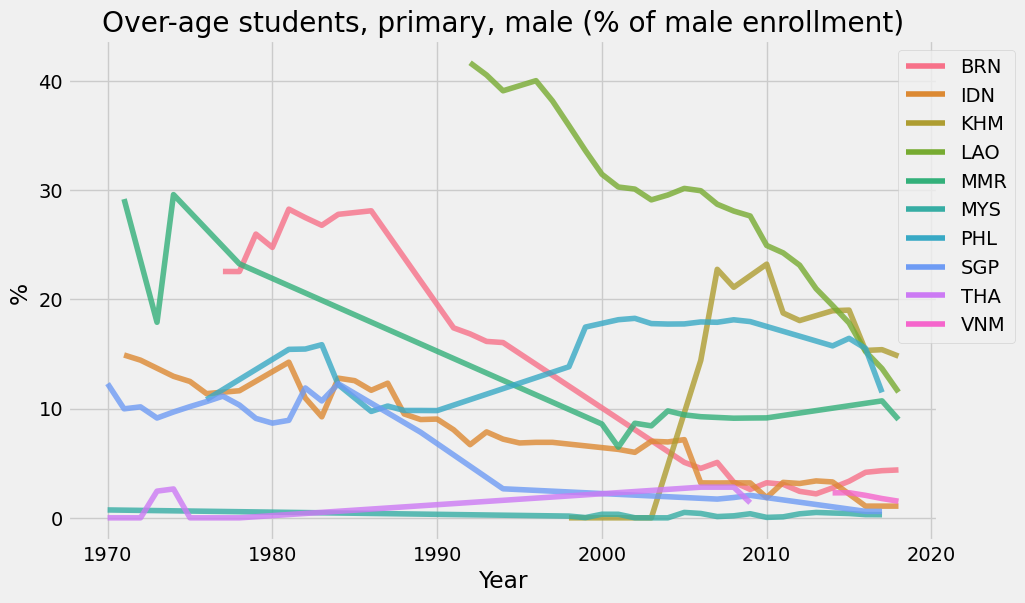

In [313]:
temp = df_all[df_all['Indicator Name']== 'Over-age students, primary, male (% of male enrollment)']
fig, axes = plt.subplots(figsize=(10, 6.18))
ax = sns.lineplot(temp, x='Year', y='Value', hue='Country ISO3', alpha=0.8)
ax.legend(bbox_to_anchor=(1.1, 1.0))
ax.set_ylabel('% ')
ax.set_title( 'Over-age students, primary, male (% of male enrollment)')

## Lazy Ah

In [323]:
lazy = ['Gross enrolment ratio, primary and secondary, male (%)',
 'School life expectancy, primary and secondary, male (years)',
 'School enrollment, tertiary, male (% gross)',
 'School life expectancy, tertiary, male (years)',
 'Primary completion rate, male (% of relevant age group)',
 'Gross intake ratio in first grade of primary education, male (% of relevant age group)',
 'Over-age students, primary, male (% of male enrollment)',
 'Repeaters, primary, male (% of male enrollment)',
 'Gross enrolment ratio, lower secondary, male (%)',
 'Lower secondary completion rate, male (% of relevant age group)',
 'Gross enrolment ratio, primary to tertiary, male (%)',
 'Repetition rate in Grade 1 of primary education, male (%)',
 'Repetition rate in Grade 2 of primary education, male (%)',
 'Gross enrolment ratio, upper secondary, male (%)',
 'Survival rate to Grade 4 of primary education, male (%)',
 'Repetition rate in Grade 3 of primary education, male (%)',
 'Persistence to grade 5, male (% of cohort)',
 'Persistence to last grade of primary, male (% of cohort)',
 'Progression to secondary school, male (%)',
 'Repetition rate in Grade 5 of primary education, male (%)',
 'Repetition rate in Grade 4 of primary education, male (%)',
 'Literacy rate, youth male (% of males ages 15-24)',
 'Literacy rate, adult male (% of males ages 15 and above)',
 'Gross graduation ratio from first degree programmes (ISCED 6 and 7) in tertiary education, male (%)',
 'Gross graduation ratio, primary, male (%)',
 'Youth illiterate population, 15-24 years, male (number)',
 'Adult illiterate population, 15+ years, male (number)']
len(lazy)

27

In [336]:
fig, axes = plt.subplots(9, 3, figsize=(40, 40))
axes = axes.flatten()
for i, col in enumerate(lazy):
  ax = sns.lineplot(df_all[df_all['Indicator Name']==col], x='Year', y='Value', hue='Country ISO3', ax=axes[i])
  ax.legend().remove()
  ax.set_title(col)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels)
ax.legend(bbox_to_anchor=(1.1, 1.0))
fig.tight_layout()

Output hidden; open in https://colab.research.google.com to view.